In [1]:
import pandas as pd

In [2]:
data_path = "../project-4-group-6/Resources/heart_2020_cleaned.csv"

data = pd.read_csv(data_path)

In [3]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
def encode_binary(value):
    if value == "Yes":
        return 1
    if value == "No":
        return 0

In [5]:
def encode_sex (sex):
    if sex == "Female":
        return 0
    if sex == "Male":
        return 1

In [6]:
def encode_BMI(value):
    if value < 18.5:
        return "Underweight (BMI < 18.5)"
    if value >= 18.5 and value < 25:
        return "Normal weight (18.5 <= BMI < 25.0)"
    if value >= 25 and value < 30:
        return "Overweight (25.0 <= BMI < 30.0)"
    if value >= 30:
        return "Obese (30.0 <= BMI)"

In [7]:
data_encoded = data.copy()

In [8]:
data_encoded = data_encoded.drop(columns=["PhysicalHealth","MentalHealth","SleepTime"])

In [9]:
data_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [10]:
data_encoded["Diabetic"].replace({"No, borderline diabetes":"No", "Yes (during pregnancy)":"Yes"}, inplace=True)

In [11]:
data_encoded["BMI"] = data_encoded["BMI"].apply(encode_BMI)

In [12]:
data_encoded["HeartDisease"] = data_encoded["HeartDisease"].apply(encode_binary)

In [13]:
data_encoded.rename(columns={"BMI":"BMICategory"},inplace=True)

In [14]:
data_encoded.head()

,HeartDisease,BMICategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,Underweight (BMI < 18.5),Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,0,Normal weight (18.5 <= BMI < 25.0),No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,0,Overweight (25.0 <= BMI < 30.0),Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,0,Normal weight (18.5 <= BMI < 25.0),No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,0,Normal weight (18.5 <= BMI < 25.0),No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [15]:
data_encoded.to_csv("../project-4-group-6/Resources/data_for_app.csv", index=False)

In [16]:
data_model = data_encoded.copy()

In [17]:
data_model.head()

,HeartDisease,BMICategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,Underweight (BMI < 18.5),Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,0,Normal weight (18.5 <= BMI < 25.0),No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,0,Overweight (25.0 <= BMI < 30.0),Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,0,Normal weight (18.5 <= BMI < 25.0),No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,0,Normal weight (18.5 <= BMI < 25.0),No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [18]:
data_model["HeartDisease"] = data_model["HeartDisease"].apply(encode_binary)
data_model["Smoking"] = data_model["Smoking"].apply(encode_binary)
data_model["AlcoholDrinking"] = data_model["AlcoholDrinking"].apply(encode_binary)
data_model["Stroke"] = data_model["Stroke"].apply(encode_binary)
data_model["DiffWalking"] = data_model["DiffWalking"].apply(encode_binary)
data_model["PhysicalActivity"] = data_model["PhysicalActivity"].apply(encode_binary)
data_model["Asthma"] = data_model["Asthma"].apply(encode_binary)
data_model["KidneyDisease"] = data_model["KidneyDisease"].apply(encode_binary)
data_model["SkinCancer"] = data_model["SkinCancer"].apply(encode_binary)
data_model["Diabetic"] = data_model["Diabetic"].apply(encode_binary)

In [19]:
data_model["Sex"] = data_model["Sex"].apply(encode_sex)

In [20]:
data_model.head()

,HeartDisease,BMICategory,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,None,Underweight (BMI < 18.5),1,0,0,0,0,55-59,White,1,1,Very good,1,0,1
1,None,Normal weight (18.5 <= BMI < 25.0),0,0,1,0,0,80 or older,White,0,1,Very good,0,0,0
2,None,Overweight (25.0 <= BMI < 30.0),1,0,0,0,1,65-69,White,1,1,Fair,1,0,0
3,None,Normal weight (18.5 <= BMI < 25.0),0,0,0,0,0,75-79,White,0,0,Good,0,0,1
4,None,Normal weight (18.5 <= BMI < 25.0),0,0,0,1,0,40-44,White,0,1,Very good,0,0,0


In [21]:
dummies_columns = data_model[["BMICategory","AgeCategory","Race","GenHealth"]].columns

In [22]:
dummies = pd.get_dummies(data_model[["BMICategory","AgeCategory","Race","GenHealth"]])

In [23]:
data_dummies = data_model.copy()

In [24]:
data_dummies = data_dummies.drop(columns=dummies_columns)

In [25]:
data_model_df = pd.concat([data_dummies, dummies], axis=1)

In [26]:
data_model_df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,None,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,None,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,None,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,None,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,None,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
data_model_df.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'BMICategory_Normal weight (18.5 <= BMI < 25.0)',
       'BMICategory_Obese (30.0 <= BMI)',
       'BMICategory_Overweight (25.0 <= BMI < 30.0)',
       'BMICategory_Underweight (BMI < 18.5)', 'AgeCategory_18-24',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54',
       'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69',
       'AgeCategory_70-74', 'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'],
      dtype='object')

In [28]:
data_model_df.to_csv("../project-4-group-6/Resources/data_for_model.csv", index=False)

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import random as random

In [30]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [31]:
heart_disease = data["HeartDisease"].value_counts()
print(heart_disease)

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


In [32]:
heart_disease.index

Index(['No', 'Yes'], dtype='object')

In [33]:
heart_disease.values

array([292422,  27373])

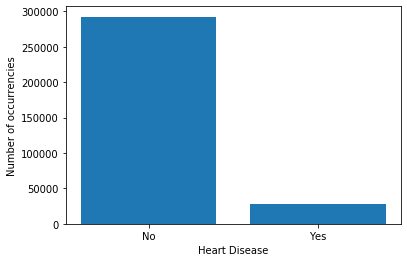

In [34]:
plt.bar(heart_disease.index, heart_disease.values, align="center")

plt.xlabel ("Heart Disease")
plt.ylabel ("Number of occurrencies")

plt.savefig('plots/heart_disease.png', dpi=300)

In [35]:
sex = data["Sex"].value_counts()
print(sex)

Female    167805
Male      151990
Name: Sex, dtype: int64


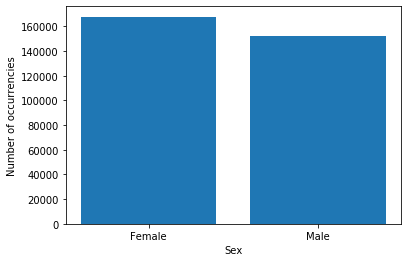

In [36]:
plt.bar(sex.index, sex.values, align="center")

plt.xlabel ("Sex")
plt.ylabel ("Number of occurrencies")

plt.savefig('plots/sex.png', dpi=300)


In [37]:
age = data["AgeCategory"].value_counts()


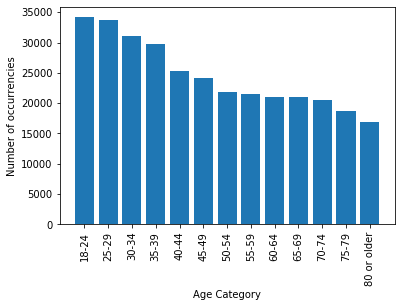

In [45]:
plt.bar(age.index.sort_values(ascending=True), age.values, align="center")

plt.xlabel ("Age Category")
plt.ylabel ("Number of occurrencies")
plt.xticks(rotation=90)
# plt.figure(figsize=[6.4,6.4])
# plt.figure(tight_layout=True)

plt.savefig('plots/age.png', dpi=300)

In [ ]:
race = data["Race"].value_counts()

In [ ]:
plt.bar(race.index, race.values, align="center")
plt.xlabel ("Race")
plt.ylabel ("Number of occurrencies")
plt.xticks(rotation=45)

plt.savefig('plots/race.png', dpi=300)

In [ ]:
health = data["GenHealth"].value_counts()
health

In [ ]:
plt.bar(health.index, health.values, align="center")
plt.xlabel ("General health")
plt.ylabel ("Number of occurrencies")

plt.savefig('plots/health.png', dpi=300)


In [ ]:
bmi_cat = data_model["BMICategory"].value_counts()

In [ ]:
plt.bar(bmi_cat.index, bmi_cat.values, align="center")
plt.xlabel ("BMI Category")
plt.ylabel ("Number of occurrencies")
plt.xticks(rotation=45)

plt.savefig('plots/bmi.png', dpi=300)

In [ ]:
smoking = data["Smoking"].value_counts()

In [ ]:
plt.bar(smoking.index, smoking.values, align="center")
plt.xlabel ("Smoking")
plt.ylabel ("Number of occurrencies")

plt.savefig('plots/smoking.png', dpi=300)



In [ ]:
alcohol = data["AlcoholDrinking"].value_counts()

In [ ]:
plt.bar(alcohol.index, alcohol.values, align="center")
plt.xlabel ("Alcohol drinking")
plt.ylabel ("Number of occurrencies")

plt.savefig('plots/alcohol.png', dpi=300)